In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import dump
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib notebook 

In [3]:
import Py_FTP_Langevin as ftp
import ftp_support

In [4]:
k_B = 1.38066e-23    #! Boltzmann constant in (J/K)
Na = 6.02214076 * pow(10,23) # 1/mol

In [5]:
fontsize_axis = 20
fontsize_legend = 16
fontsize_ticks = 14

# First time passage simulations

In [6]:
cols = ["Kn_d_j",
        "H",
        "ftp_times_j",
        "ftp_times_std_j",
        "tau_12_j",
        "Kn_g_j",
        "L_j",
        "Rc_j",
        "V_box",
        "t_ij",
        "A_k_BT"]

In [7]:
# Read our results - diffusive
our_diffusive = pd.read_csv('old_results/01_spheres_with_vdW/validation_spheres_with_vdw_diffusive.dat',names=cols, sep=',')
our_diffusive.head()

Kn_d_j         H  ftp_times_j  ftp_times_std_j  tau_12_j    Kn_g_j  \
0  0.018604  0.004378   491.677047       474.294195  0.000006  0.173711   
1  0.018604  0.004478   480.652546       402.627459  0.000006  0.173711   
2  0.018604  0.004636   464.317958       435.281767  0.000006  0.173711   
3  0.018604  0.004491   479.218197       470.123820  0.000006  0.173711   
4  0.018604  0.004809   447.579860       418.951738  0.000006  0.173711   

       L_j      Rc_j         V_box          t_ij    A_k_BT  
0  0.00007  0.000001  3.430000e-13  7.835196e+07  0.000000  
1  0.00007  0.000001  3.430000e-13  7.659513e+07  0.500000  
2  0.00007  0.000001  3.430000e-13  7.399211e+07  0.997368  
3  0.00007  0.000001  3.430000e-13  7.636656e+07  1.989487  
4  0.00007  0.000001  3.430000e-13  7.132478e+07  3.968503

In [8]:
# Read our results - ballistic
our_ballistic = pd.read_csv('old_results/01_spheres_with_vdW/validation_spheres_with_vdw_ballistic.dat',names=cols, sep=',')
our_ballistic.head()

Kn_d_j            H   ftp_times_j  ftp_times_std_j      tau_12_j  \
0  621.245273  2968.863997  3.216038e-07     3.123740e-07  2.783667e-09   
1  621.245273  4863.959626  1.963005e-07     1.894540e-07  2.783667e-09   
2  621.245273  4585.136749  2.082376e-07     1.953187e-07  2.783667e-09   
3  621.245273  4639.535274  2.057960e-07     1.973385e-07  2.783667e-09   
4  621.245273  4839.208149  1.973046e-07     1.951273e-07  2.783667e-09   

        Kn_g_j           L_j          Rc_j         V_box        t_ij    A_k_BT  
0  1264.493085  7.000000e-08  1.000000e-09  3.430000e-22  115.532406  0.000000  
1  1264.493085  7.000000e-08  1.000000e-09  3.430000e-22   70.518677  0.500000  
2  1264.493085  7.000000e-08  1.000000e-09  3.430000e-22   74.806929  0.997368  
3  1264.493085  7.000000e-08  1.000000e-09  3.430000e-22   73.929818  1.989487  
4  1264.493085  7.000000e-08  1.000000e-09  3.430000e-22   70.879365  3.968503

In [9]:
# Read Ouyang results
ouyang_res = pd.read_csv('old_results/Ouyang_res.dat', sep='\t')
ouyang_res.head()

A/(k_b*T)    n_C   n_FM
0        0.5  1.039  1.274
1        1.5  1.075  1.434
2        2.5  1.100  1.535
3        3.5  1.119  1.612
4        4.5  1.136  1.676

<IPython.core.display.Javascript object>


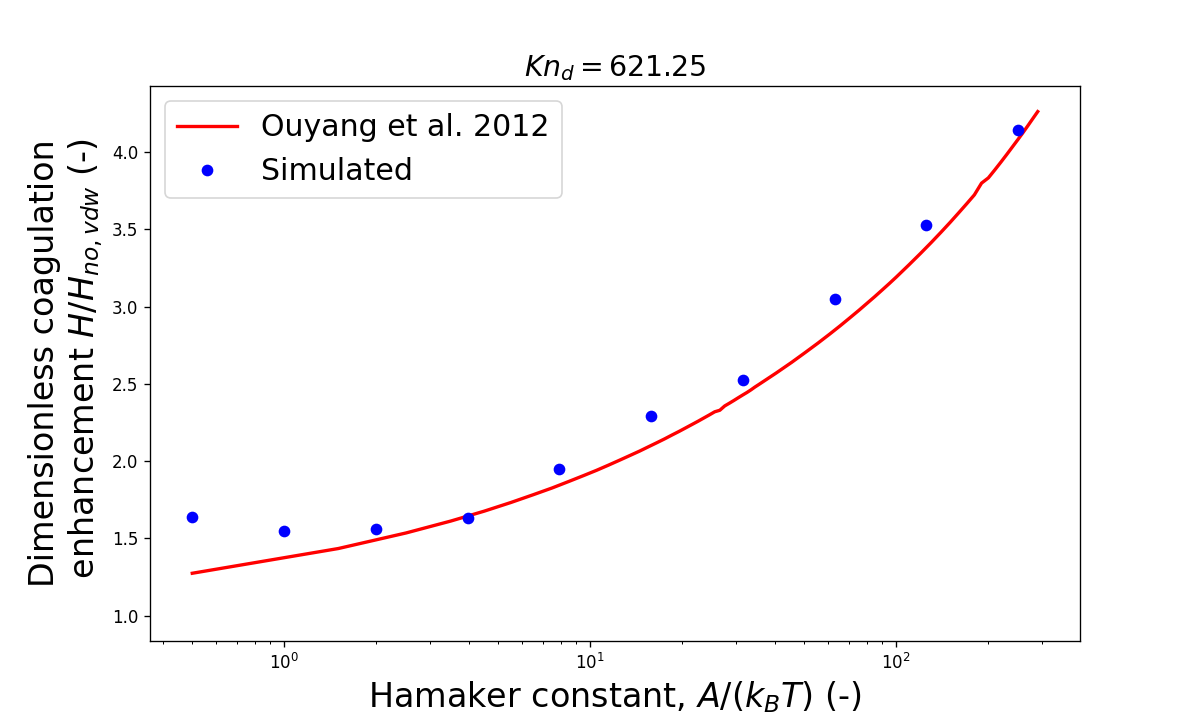

In [10]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
#ax1.plot(ouyang_res["A/(k_b*T)"],ouyang_res["n_C"],"-r", linewidth=2,label="Ouyang et al. 2012")
ax1.plot(ouyang_res["A/(k_b*T)"],ouyang_res["n_FM"],"-r", linewidth=2,label="Ouyang et al. 2012")
ax1.plot(our_ballistic["A_k_BT"],our_ballistic["H"]/our_ballistic["H"].iloc[0],"o b",label="Simulated")
title = "$Kn_d=$"+str(round(our_ballistic["Kn_d_j"].iloc[0],2))
plt.title(title,fontsize=17)
plt.xscale("log")
ax1.set_xlabel('Hamaker constant, $A/(k_BT)$ (-)', fontsize=20)
ax1.set_ylabel('Dimensionless coagulation\n enhancement $H/H_{no,vdw}$ (-)', fontsize=20)
plt.legend(fontsize=18, loc=0), plt.show()
plt.savefig('old_results/vdW_ballistic.png')

<IPython.core.display.Javascript object>


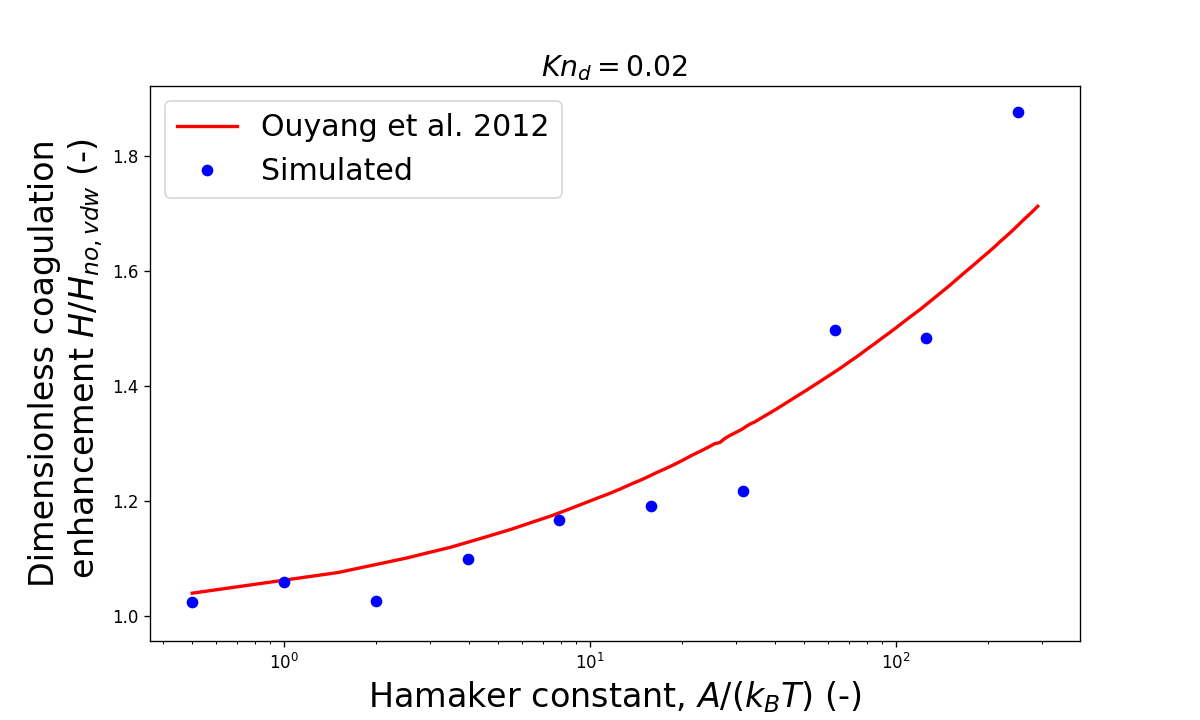

In [11]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1.plot(ouyang_res["A/(k_b*T)"],ouyang_res["n_C"],"-r", linewidth=2,label="Ouyang et al. 2012")
#ax1.plot(ouyang_res["A/(k_b*T)"],ouyang_res["n_FM"],"-r", linewidth=2,label="Ouyang et al. 2012")
ax1.plot(our_diffusive["A_k_BT"],our_diffusive["H"]/our_diffusive["H"].iloc[0],"o b",label="Simulated")
title = "$Kn_d=$"+str(round(our_diffusive["Kn_d_j"].iloc[0],2))
plt.title(title,fontsize=17)
plt.xscale("log")
ax1.set_xlabel('Hamaker constant, $A/(k_BT)$ (-)', fontsize=20)
ax1.set_ylabel('Dimensionless coagulation\n enhancement $H/H_{no,vdw}$ (-)', fontsize=20)
plt.legend(fontsize=18, loc=0), plt.show()
plt.savefig('old_results/vdW_diffusive.png')

In [24]:
def Logistic(x,k):
    a_max = 2
    a_min = 1
    return a_max/(1+np.exp(-k*(x-x0))) + a_min

# Logistic function
x = np.linspace(0,5, 2000)
x0 = 2
k1 = 1 * x0
k2 = 5 * x0
k3 = 100 * x0


<IPython.core.display.Javascript object>


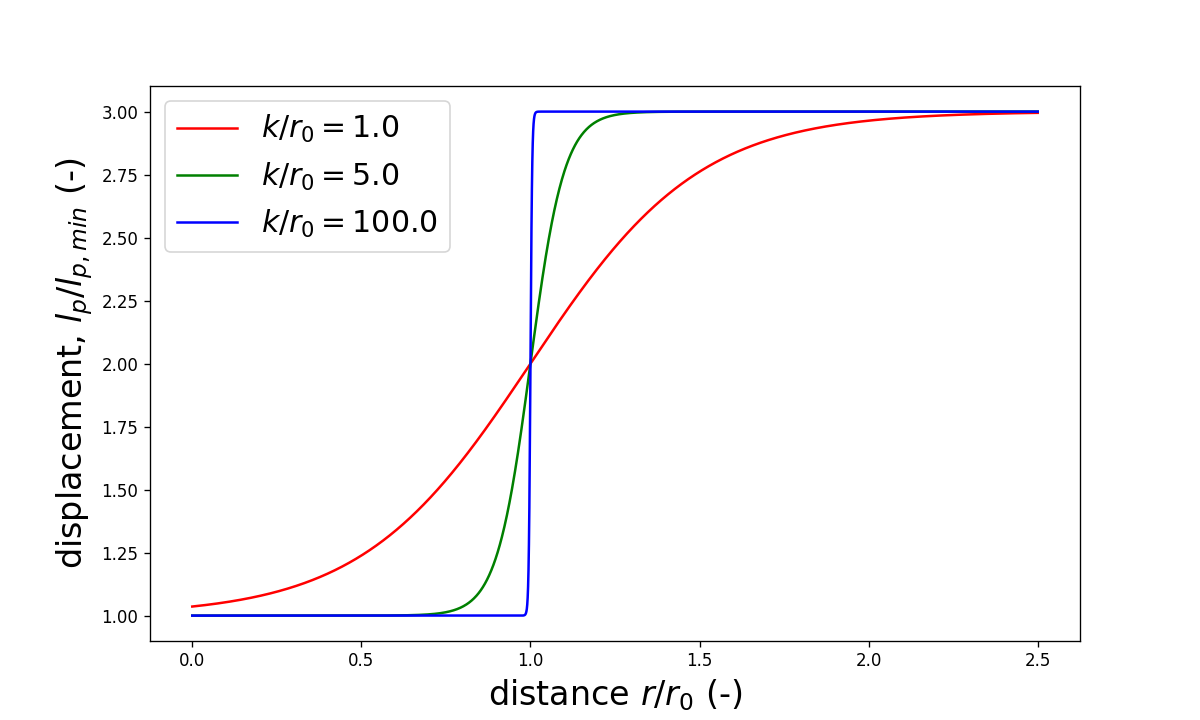

In [28]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1.plot(x/x0, Logistic(x,k1),"-r",label="$k/r_0=$"+str(k1/x0))
ax1.plot(x/x0, Logistic(x,k2),"-g",label="$k/r_0=$"+str(k2/x0))
ax1.plot(x/x0, Logistic(x,k3),"-b",label="$k/r_0=$"+str(k3/x0))

ax1.set_xlabel('distance $r/r_0$ (-)', fontsize=20)
ax1.set_ylabel('displacement, $l_p/l_{p,min}$ (-)', fontsize=20)
plt.legend(fontsize=18, loc=0), plt.show()
plt.savefig('old_results/Logistic_function.png')